# Polynomial Regression

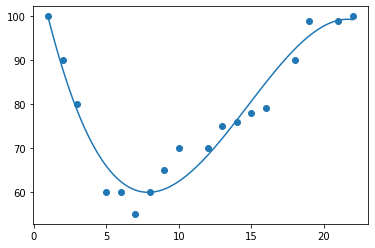

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [2]:
mymodel

poly1d([-3.03208795e-02,  1.34333191e+00, -1.55383039e+01,  1.13768037e+02])

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
X = np.arange(6).reshape(3, 2)

In [5]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [6]:
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

# Ridge Regression

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

In [9]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

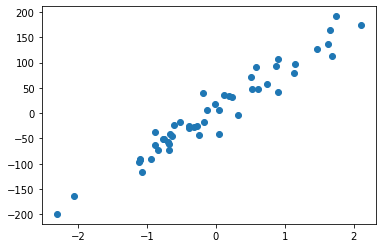

In [10]:
plt.scatter(X, y)

In [11]:
rr = Ridge(alpha=1)
rr.fit(X, y)
w = rr.coef_
w

array([83.16318084])

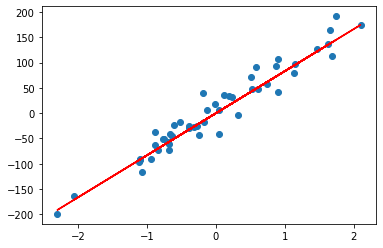

In [12]:
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

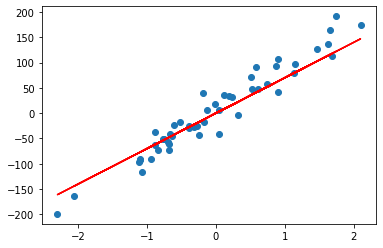

In [24]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

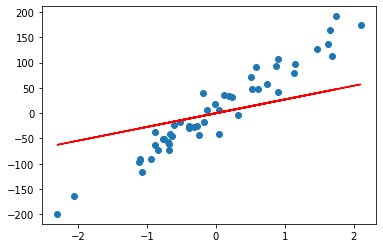

In [25]:
rr = Ridge(alpha=100)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

In [26]:
rr.coef_

array([27.15729366])

## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

In [35]:
def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    
    X=np.c_[np.ones(len(data_vector)), data_vector]
    beta = np.linalg.inv(np.dot(X.T, X)+np.dot(np.eye(len(X[0])), lmb)).dot(X.T).dot(response_vector)

        
    return beta

In [36]:
w = fit_1d_ridge_regression(X, y, 0.1)

In [65]:
theta=np.random.randn(10)
theta
while 0 in theta:
    theta=np.random.randn(10)
theta

array([-1.3062318 , -1.72215461, -0.1611284 ,  0.97373918, -1.17656265,
       -0.26033676, -0.58041651, -0.96559994,  0.08420074, -0.2850618 ])

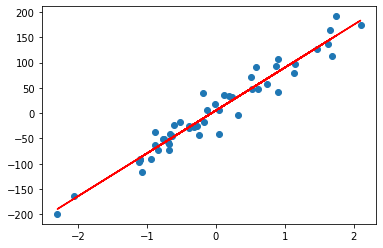

In [38]:
plt.scatter(X, y)
plt.plot(X, w[0]+w[1]*X, c='red')

In [94]:
def fit_1d_lasso_regression(data_vector, response_vector, n_iterations = 1000, learning_rate = 0.1, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """    
    m, n = data_vector.shape 
    
    w0 = response_vector.mean()

    theta = np.random.randn(n)
    while 0 in theta:
        theta=np.random.randn(n)
    
    for i in range(n_iterations):
        absgrad=np.array([-1 if i<0 else 1 for i in theta])
        grad = 2/m*data_vector.T.dot(np.dot(data_vector, theta)-response_vector) + lmb/m*absgrad
        theta=theta-learning_rate*grad
    return np.append(w0, theta)

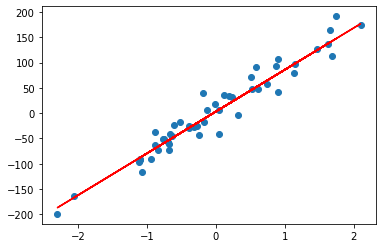

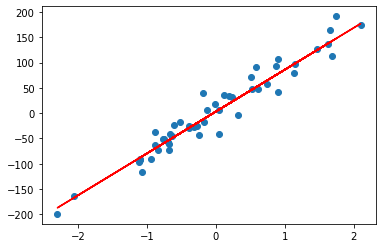

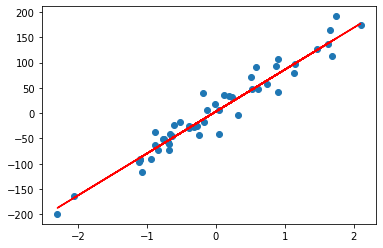

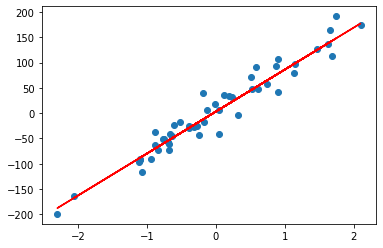

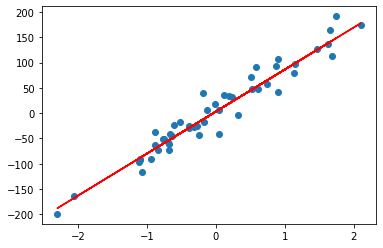

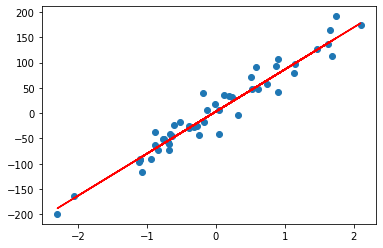

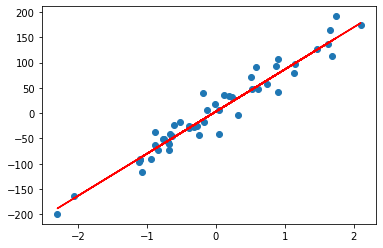

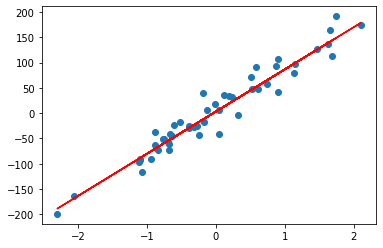

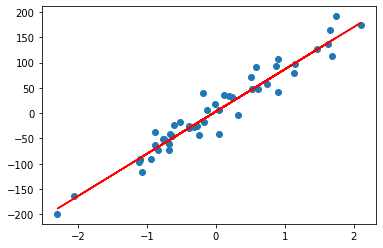

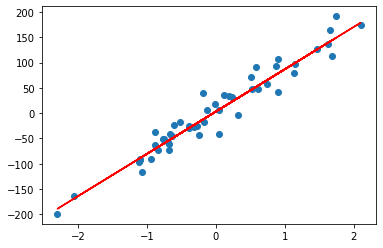

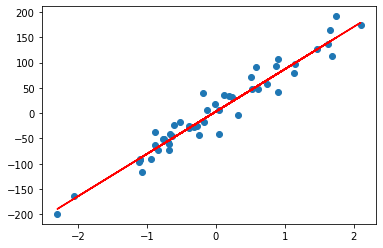

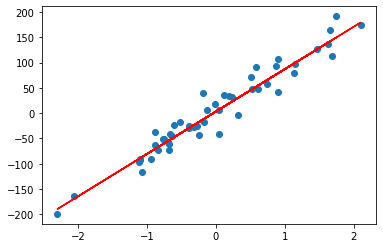

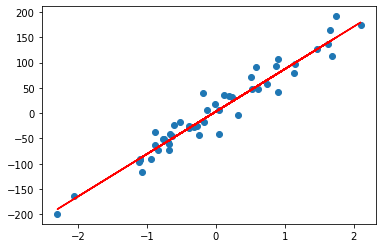

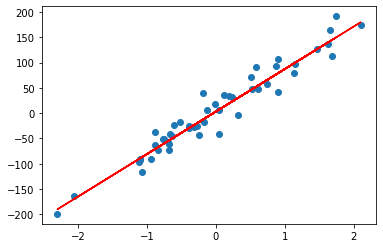

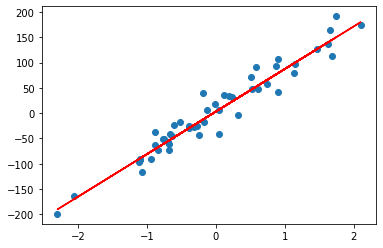

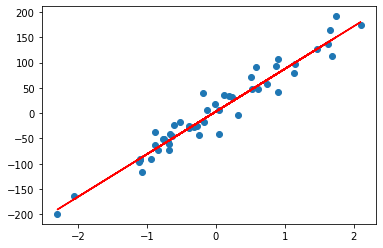

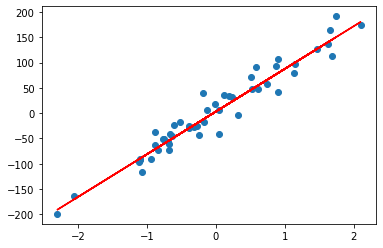

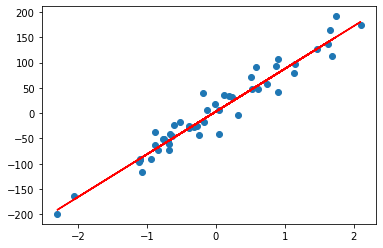

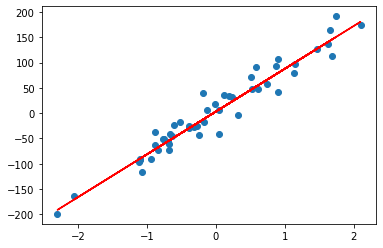

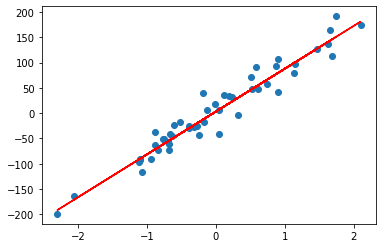

In [95]:
for lmb in range(200, 0, -10):
    w = fit_1d_lasso_regression(X, y, learning_rate=0.01, lmb=lmb)
    plt.scatter(X, y)
    plt.plot(X, w[0]+w[1]*X, c='red')
    plt.show()

## Apply your implemented lasso and ridge regression functions to the data

In [96]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [97]:
X = dataframe[dataframe.columns.difference([13])]
y = dataframe[13]

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
beta = fit_1d_ridge_regression(X_train, y_train)
beta

array([ 1.11664688e+01, -1.04122528e-01,  3.37326308e-02,  1.59449716e-02,
        2.57326178e+00, -5.99233157e+00,  5.36407101e+00, -1.23507537e-02,
       -1.15324333e+00,  1.89343879e-01, -9.69034031e-03, -6.17723378e-01,
        1.49102017e-02, -4.76070049e-01])

In [100]:
beta = fit_1d_lasso_regression(X_train, y_train, n_iterations=1000, learning_rate=0.00001, lmb=1)
beta

array([22.79653465,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan])

### tunning ridge hyperparametr

In [101]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.model_selection import RepeatedKFold

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -3.379
Config: {'alpha': 0.51}


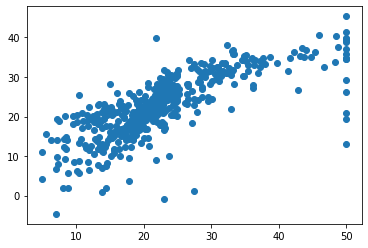

In [102]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)

## Implement GridSearchCV using numpy 

In [ ]:
import numpy as np

# ___Import Everything you need.
# ___For Example:

from sklearn import metrics
from inspect import signature
from itertools import product
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

class MyGridSearchCV:
    
    def __init__(self, estimator, param_grid: dict, scoring=None, refit=True, cv=None):
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring
        self.refit = refit
        if cv is None:
            self.cv = KFold()
        else:
            self.cv = cv
            
            # TODO
        scoring= sklearn.metrics.SCORERS.keys()
        self.scoring=scoring

    def fit(self, X, y):
        
        X, y = np.array(X), np.array(y)
        
        # TODO
        
        return self

In [107]:
import sklearn
scoring=sklearn.metrics.SCORERS.keys()
type(scoring)

dict_keys

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = MyGridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
predictions = cross_val_predict(Ridge(alpha=0.51), X, y)
plt.scatter(y, predictions)

In [ ]:
y_pred = results.predict(X)
print('MAE: %.3f' % metrics.mean_absolute_error(y_pred, y))